## Ruptrues: A Change Point Detection Library For Sequential Data

## 1. Introduction

Rupture is a python library for change point detection.  Change point dectection is the technique used in many time series data, to identify the sudden change in the non-staionary data. Examples of the application of change point detection could be: 
* Monitoring and detect the sudden change of temperature in a room or freezer. 
* Generating warnings of the sudden change in patient's blood oxygen level 
* Monitoring the number of new user registrations for a website, to identify the sudden increase of users which are not normal 

As one can see, there are countless number of the potential application change point detection algorithm. The reason that I want to introduce the Ruptures library is because: 
* It has various of powerful and robust change point detection algorithm
* The library has easy to use interface and user manual and examples are straight forward to follow

### 1.1 Instation

User can install the Ruptrues library using both pip and conda:
* With pip3 from terminal:  pip3 install ruptures
* To install this package with conda run:  conda install -c ralexx ruptures

## 2. Creating Data with Change Point
In this section, we create time series (sequential) data with change point. This data will be used for illustration the different change point detection algorithms. Ruptures library provide a built in function that generate sequential data with user specified number of change point. We built 3 testing data sets:
* Signal_1 has 3 change points and medium level of noise. this is used as a normal dataset
* Signal_2 has 5 change points and high level of noise. It represents a challenging dataset
* Signal_3 has 2 change opints and low level of noise. It represent an easy data set

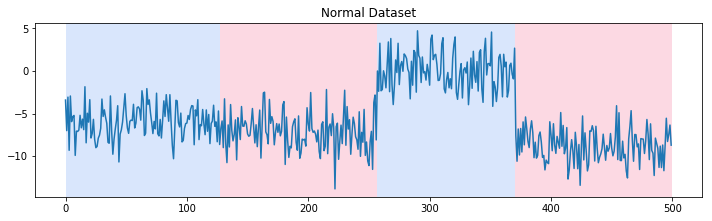

In [34]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

# creation of data_1
n, dim = 500, 1
n_bkps, sigma = 3, 2
signal_1, bkps_1 = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)
rpt.show.display(signal_1, bkps_1, figsize=(10, 3))
plt.title('Normal Dataset')
plt.show()

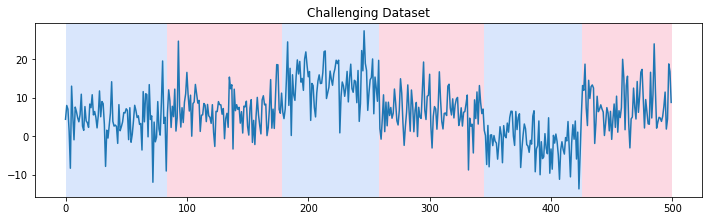

In [35]:
# creation of data
n, dim = 500, 1
n_bkps, sigma = 5, 5
signal_2, bkps_2 = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)
rpt.show.display(signal_2, bkps_2, figsize=(10, 3))
plt.title('Challenging Dataset')
plt.show()

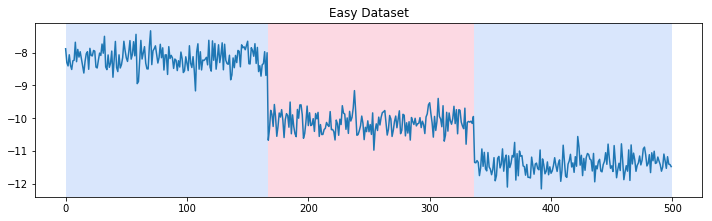

In [41]:
# creation of data
n, dim = 500, 1
n_bkps, sigma = 2, 0.3
signal_3, bkps_3 = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)
rpt.show.display(signal_3, bkps_3, figsize=(10, 3))
plt.title('Easy Dataset')
plt.show()

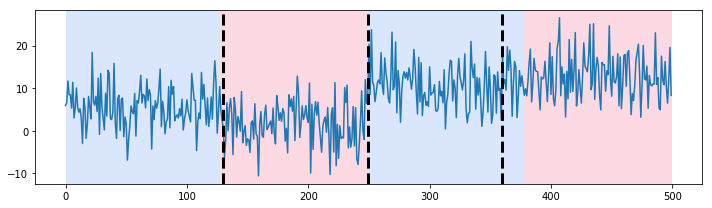

In [13]:
# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(signal_1)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal_1, bkps_1, my_bkps, figsize=(10, 3))
plt.show()

## 2. Change Point Detection Algorithms
In this section, we will illustrate how to use the 3 of the change point detection algorithms: Binary segmentation, Bottome-up segmentation, and Window-based change point detection. <br> We will perform change point detection on the 3 datasets (normal, challenging and easy), then we will compare their performance

### 2.1 Binarr Segmentation

#### Binary segmentation introduction
The binary segmentation algorithm uses similary process of building a binary tree. It will first split the whole dataset at the biggest change point, thus breaking the dataset into two subsets. Then in each of the subset, the algorithm will repeat the binary process of finding the biggest change point in each subset. <br>
One of the required input of binary segmentation algorithms, is number of break points. This leaves the method a big limitation. The user need to have some knowledge of how many change points exists in the dataset.

Next, we apply the binary segmentation algorithm on the 3 dataset that we created. The ture segmentation is shown as the background color, and the predicted change point is shown as the black dashline

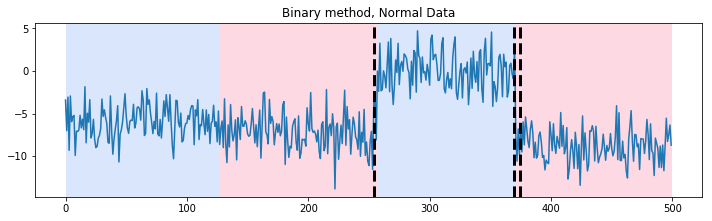

In [44]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model=model).fit(signal_1)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal_1, bkps_1, my_bkps, figsize=(10, 3))
plt.title('Binary method, Normal Data')
plt.show()

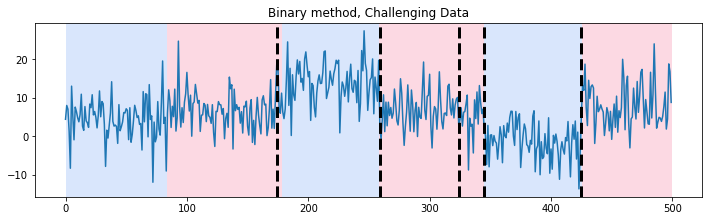

In [49]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model=model).fit(signal_2)
my_bkps = algo.predict(n_bkps=5)

# show results
rpt.show.display(signal_2, bkps_2, my_bkps, figsize=(10, 3))
plt.title('Binary method, Challenging Data')
plt.show()

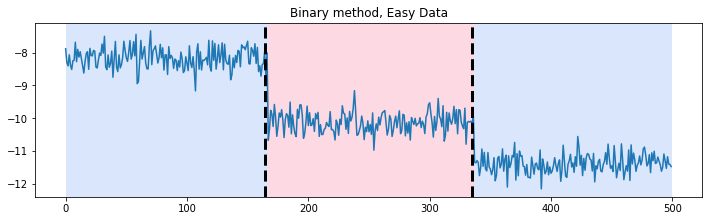

In [48]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model=model).fit(signal_3)
my_bkps = algo.predict(n_bkps=2)

# show results
rpt.show.display(signal_3, bkps_3, my_bkps, figsize=(10, 3))
plt.title('Binary method, Easy Data')
plt.show()

#### Binary segmentation results:
To summary the above test, the binary segmentation method shows reasonable accuracy. The biggest limitate as mentioned before, is the user need to specify total number of change points. The binary segmentation method identified change points: 
* 2/3 for Normal Dataset
* 4/5 for the Challenging Dataset
* 2/2 for the Easy Dataset

For all three test datasets, the recall is 0.8, precision is 0.8

### 2.2 Bottom-up segmentation

#### Bottom-up segmentation introduction
The bottom-up segmentation uses the following process for identifying change points: 
"First, the signal is divided in many sub-signals along a regular grid. Then contiguous segments are successively merged according to a measure of how similar they are." <br>
Similar to the binary segmentation method, the totally number of change points need to be specified. This again place a limitation on the applicability of the algorithm, especially for the dataset that user don't have prior knowlege. 

Next, we apply the bottom0up segmentation algorithm on the 3 dataset that we created. The ture segmentation is shown as the background color, and the predicted change point is shown as the black dashline

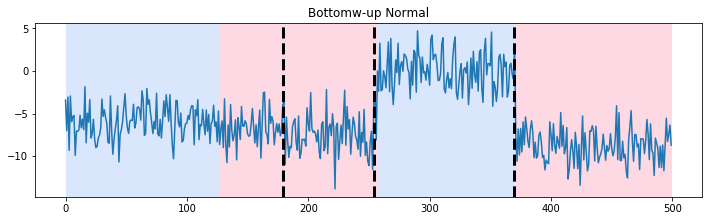

In [51]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(signal_1)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal_1, bkps_1, my_bkps, figsize=(10, 3))
plt.title('Bottomw-up Normal')
plt.show()

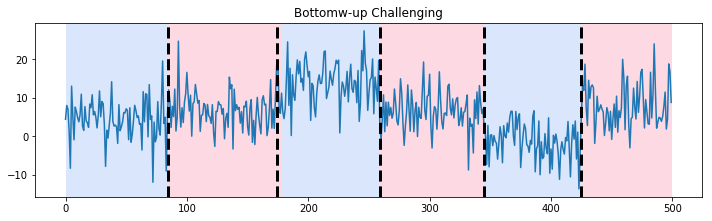

In [53]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(signal_2)
my_bkps = algo.predict(n_bkps=5)

# show results
rpt.show.display(signal_2, bkps_2, my_bkps, figsize=(10, 3))
plt.title('Bottomw-up Challenging')
plt.show()

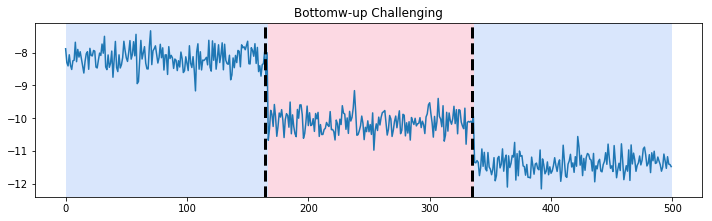

In [54]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(signal_3)
my_bkps = algo.predict(n_bkps=2)

# show results
rpt.show.display(signal_3, bkps_3, my_bkps, figsize=(10, 3))
plt.title('Bottomw-up Challenging')
plt.show()

#### Bottom-up segmentation results:

To summary the above test, the bottom-up segmentation method shows better accuracy than the binary segmentation. But still, the biggest limitate is the user need to specify total number of change points. The bottom-up segmentation method identified change points:

* 2/3 for Normal Dataset
* 5/5 for the Challenging Dataset
* 2/2 for the Easy Dataset

For all three test datasets, the recall is 0.8, precision is 0.8

### 2.3 Window-based Change Point Detection

#### Window-based algorithm introduction
The window-based method uses the following methodology to identify the change point:
"the algorithm uses two windows which slide along the data stream. The statistical properties of the signals within each window are compared with a discrepancy measure." <br>
Different from the previous two method (binary and bottom-up segmentation method), the user does not need to specify totally number of change points. This removes the biggest limitation of the algorithm, making window-based algorithm a great candicate method for many applications.

Next, we apply the bottom0up segmentation algorithm on the 3 dataset that we created. The ture segmentation is shown as the background color, and the predicted change point is shown as the black dashline

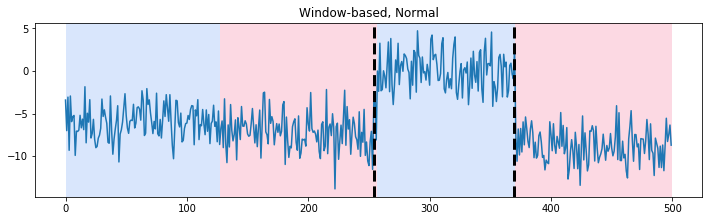

In [60]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal_1)
my_bkps = algo.predict(pen=np.log(n)*dim*2**2)

# show results
rpt.show.display(signal_1, bkps_1, my_bkps, figsize=(10, 3))
plt.title('Window-based, Normal')
plt.show()

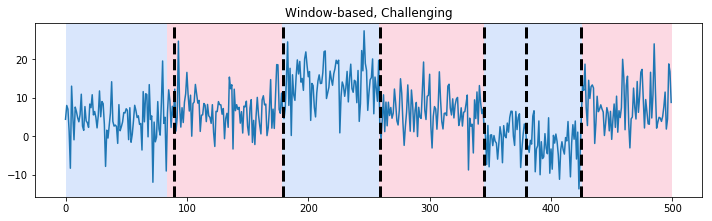

In [63]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal_2)
my_bkps = algo.predict(pen=np.log(n)*dim*5**2)

# show results
rpt.show.display(signal_2, bkps_2, my_bkps, figsize=(10, 3))
plt.title('Window-based, Challenging')
plt.show()

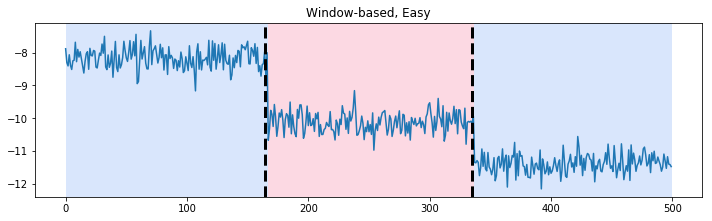

In [65]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal_3)
my_bkps = algo.predict(pen=np.log(n)*dim*0.3**2)

# show results
rpt.show.display(signal_3, bkps_3, my_bkps, figsize=(10, 3))
plt.title('Window-based, Easy')
plt.show()

#### Window-based method results:

To summary the above test, the window-based method shows best performance out of the 3 algorithm (for our given dataset). Also, the biggest advantage of using window-based method is: the user do not need to specify number of change points.  The window-based method identified the following change points:

* 2/3 for Normal Dataset
* 5/5 for the Challenging Dataset
* 2/2 for the Easy Dataset

For all three test datasets, the recall is 1.0, precision is 0.9

## 3. Summary

In this spotlight document, we introduced a robust and power python library for change point detection. Using 3 test dataset, which has different level of detection difficulty (normal, challenging, easy), we tested the perofrmance of three algorithms: 
* Window-based method has the best performance, it has a recall of 1.0, which means all the change points (at different noise level) were idnetified. 
* Window-based method also does not require number of change points as input. This expands the application of the algorithms to much wider dataset, whic user do not need to have prior knowledge.
* Bottom-up segmentation method is our second recommended method, it was able to identify 90% of the true change points. However, it requires total number of change points as input
* Binary segmentation method shows acceptable performance, which identified 80% of the change points. However, this method shows the lowest recall and still require total number of change points as input.

## 4. Resources

https://github.com/deepcharles/ruptures <br>
https://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/general-info.html#user-guide